In [18]:
#Polynomial Regression Tutorial

In [91]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [31]:
# import Housing.csv
df = pd.read_csv('data/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [32]:
# filter only area and price
df = df.loc[:, ['area', 'price']]
df.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


Text(0, 0.5, 'price')

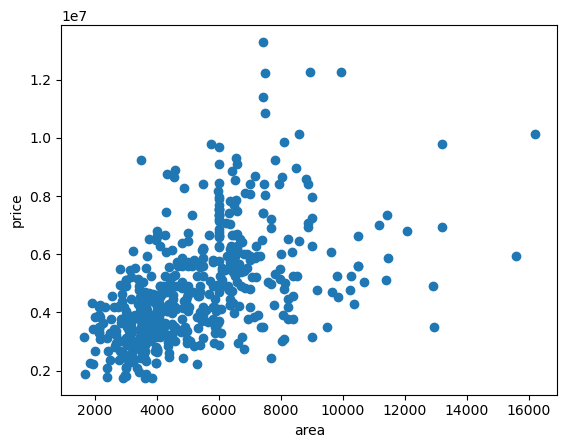

In [33]:
#create x,y arrays

x = df["area"]
y = df["price"]

#draw scatter plot

plt.scatter(x,y)
plt.xlabel("area")
plt.ylabel("price")

In [35]:
from sklearn.preprocessing import MinMaxScaler

df_columns = df.columns

scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# rename columns (since now its an np array)

df = pd.DataFrame(df)
df.columns = df_columns

df.head()

,area,price
0,0.396564,1.000000
1,0.502405,0.909091
2,0.571134,0.909091
3,0.402062,0.906061
4,0.396564,0.836364


Text(0, 0.5, 'price')

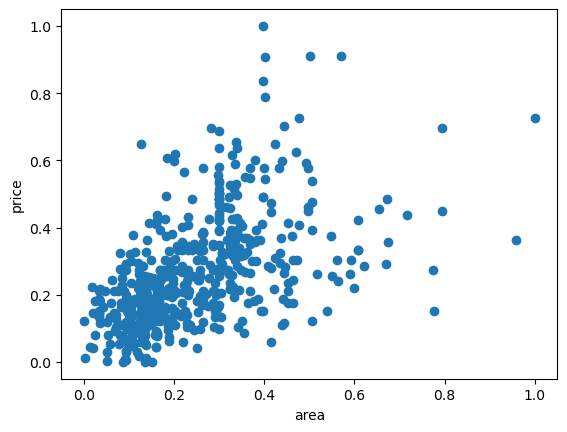

In [41]:
#create x,y arrays

x = df["area"]
y = df["price"]

#draw scatter plot

plt.scatter(x,y)
plt.xlabel("area")
plt.ylabel("price")

<AxesSubplot:ylabel='price'>

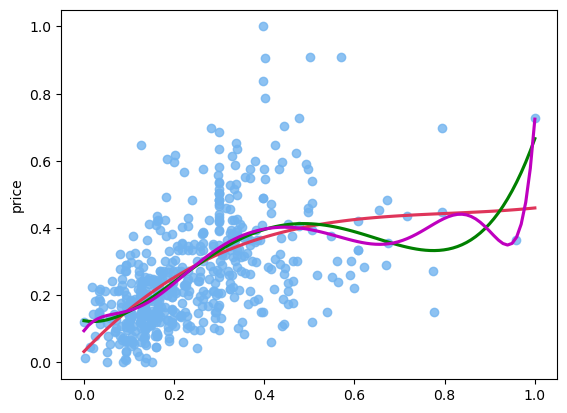

In [101]:
sns.regplot(x=x,y=y,order=3, scatter_kws={'color': '#71b3ef'}, line_kws={'color': '#df355a'}, ci=None)
sns.regplot(x=x,y=y,order=4, scatter=False, line_kws={'color': 'g'}, ci=None)
sns.regplot(x=x,y=y,order=10, scatter=False, line_kws={'color': 'm'}, ci=None)

In [97]:
#specify degree of 3 for polynomial regression model
#include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures(degree=1, include_bias=False)

#reshape data to work properly with sklearn
poly_features = poly.fit_transform(x.reshape(-1, 1))

#fit polynomial regression model
model = LinearRegression()
model.fit(poly_features, y)

y_pred = model.predict(x)


#display model coefficients
score = model.score(x, y)

print("\n\nModel score : ", score)



Model score :  0.2872931546811467
